<a href="https://colab.research.google.com/github/jonmessier/LSTM-study/blob/main/LSTM_Long_Short_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Overview
## What is an LSTM?
Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture, designed to address the vanishing gradient problem that can occur in traditional RNNs. RNNs are a class of artificial neural networks where connections between units can create cycles, allowing them to exhibit dynamic temporal behavior. They are particularly well-suited for tasks involving sequences, such as time series prediction, speech recognition, and natural language processing.



##Vanishing Gradient problem
The [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) arises when training RNNs on long sequences. During backpropagation, gradients can become extremely small, causing the weights to stop updating effectively, and therefore hindering the learning process. LSTMs were introduced to overcome this issue.

## Structure of an LSTM
LSTM networks incorporate memory cells that can store information for long periods, and they use a gating mechanism to control the flow of information into and out of the cell. The key components of an LSTM cell include:

1. Cell State (Ct): The long-term memory that can be passed along the sequence.
2. Hidden State (ht): The short-term memory or the output that gets passed to the next time step.

The LSTM cell has three densely connected gates, each serving a specific purpose:
1.    **Forget Gate**: Determines what information from the cell state should be discarded or kept.
  - Input Size: Concatenation of the previous hidden state (ht-1) and the current input (xt).
  - Purpose: Decides what information from the cell state (Ct-1) should be discarded or kept. It outputs a number between 0 and 1 for each element in the cell state, where 0 means "completely forget" and 1 means "completely remember."
  - Equation:
    $$f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$$
  - Here, $f_t$​ is the forget gate output, $\sigma$ is the sigmoid activation function, $W_f$​ and $b_f$ are the weights and biases associated with the forget gate, and $[h_{t-1}, x_t]$ denotes the concatenation of $h_{t-1}h and x_t​.

2.    **Input Gate**: Decides what new information to store in the cell state.
 -     Input Size: Concatenation of the previous hidden state (ht-1) and the current input (xt).
 - Purpose: Decides what new information to store in the cell state (Ct). It produces a vector of candidate values that could be added to the cell state.
 - Equation:
    $$i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)$$
    $$\tilde{C}_t = \tanh(W_c \cdot [h_{t-1}, x_t] + b_c)$$
 - Here, $i_t$​ is the input gate output, $W_i$​, $b_i$​, $W_c$​, and $b_c$​ are weights and biases, $\tilde{C}_t$​ is the candidate cell state, and $⁡\tanh$ is the hyperbolic tangent activation function.
3.    **Output Gate**: Determines the next hidden state based on the current input and the cell state.
  - Input Size: Concatenation of the previous hidden state $(ht-1)$, the current input $x_t$, and the candidate cell state $\tilde{C}_t$.
  - Purpose: Determines the next hidden state (ht) based on the current input and the cell state. It filters the information from the cell state that the network will output.
  - Equation:
    $$o_t = \sigma(W_o \cdot [h_{t-1}, x_t, \tilde{C}_t] + b_o)$$
    $$h_t = o_t \cdot \tanh(C_t)$$
  - Here, $o_t$​ is the output gate output, $W_o$​ and $b_o$​ are weights and biases, $⁡\tanh$ is the hyperbolic tangent activation function, $C_t$​ is the updated cell state, and $h_t$​ is the hidden state.


## StatQuest video on LSTM
This Statquest video shows how each gate of the LSTM works, the difference with usage of activation functions, the difference with long and short term memory.

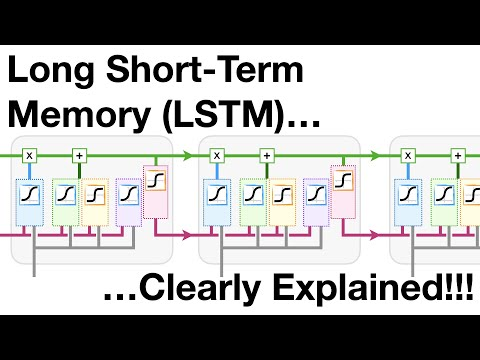

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('YCzL96nL7j0', width=400, height=300)

#Stock predictor overview
The following code is adapted from this [WEBSITE](https://medium.com/@dmytrosazonov/how-to-predict-stock-market-using-google-tensorflow-and-lstm-neural-network-81ccc41a22a8)

This code has a simple model for price prediction based on previous closing price of the stock.  It doesn't take into account, volume, opening price, high, or low price.  In effect this is a pretty dumb stock predictor and should not be used to make financial decisions.  

  



##Imports
Use the [Yahoo Finance package](https://theautomatic.net/yahoo_fin-documentation/) for historic stock data.  

In [ ]:
!pip install yahoo_fin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.8 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=54a795980dd6b29be7d2169a37d45b0504ea3327cd29d0bc503650f9f3863b48
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=c4076fc6433dec99fb182437a90fb16bb7f3f1bce02742c446259e0f0ed0217c
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found existi

In [ ]:
import numpy as np
import time as tm
import datetime as dt
import tensorflow as tf

# Data preparation
from yahoo_fin import stock_info as yf
from sklearn.preprocessing import MinMaxScaler
from collections import deque

# Machine Learning packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Graphics library
import matplotlib.pyplot as plt

##Settings

For our neural network we will use some settings. Here’s the short explanation of each of them:

- Parameter **‘N_STEPS’** means the number of days for our window. It is the depth which our neural network will be using;
- Parameter **‘LOOKUP_STEPS’** is the array which includes the number and sequence of days which we will predict for. There are three days in our example [1 day — the next day, tomorrow, 2 — second day, the day after tomorrow, 3 — third day, the day after the second day]. If we want to predict for 4 or 5 days, — we need to put in here the following numbers like this [1, 2, 3, 4, 5]
- Parameter **‘STOCK’** corresponds to ticker on the market which we will investigate in our study. For instance, in our case it is Google (GOOGL the ticker on NASDAQ);
- As you may see we also use **‘date_now’** which is the current day and **‘date_3_years_back’** which will let us look 1104 days back in the retrospective history of the daily price for the abovementioned stock ticker;

In [ ]:
# Window size or the sequence length, 7 (1 week)
N_STEPS = 7

# Lookup steps, 1 is the next day, 3 = day after tomorrow
LOOKUP_STEPS = [1, 2, 3]

# Stock ticker, GOOGL
STOCK = 'GOOGL'

# Current date
date_now = tm.strftime('%Y-%m-%d')
date_3_years_back = (dt.date.today() - dt.timedelta(days=1104)).strftime('%Y-%m-%d')

## Import Data

In [ ]:
# LOAD DATA
# from yahoo_fin
# for 1104 bars with interval = 1d (one day)
init_df = yf.get_data(
    STOCK,
    start_date=date_3_years_back,
    end_date=date_now,
    interval='1d')

Let’s check the data that was uploaded. As we can see below we uploaded the whole list of columns by default from the web service. The column ‘open’ means the price on the opening market, column ‘close’ — price on the closing market. We also have some other columns including even the ticker itself.

In [ ]:
init_df.head()

,open,high,low,close,adjclose,volume,ticker
2020-12-21,85.456497,86.849998,84.699997,86.727997,86.727997,33974000,GOOGL
2020-12-22,86.466499,86.630501,85.289001,86.011002,86.011002,20370000,GOOGL
2020-12-23,86.196503,87.205498,86.059998,86.411499,86.411499,22974000,GOOGL
2020-12-24,86.449997,87.120499,86.217499,86.708000,86.708000,9312000,GOOGL
2020-12-28,87.245499,89.349998,87.091003,88.697998,88.697998,27650000,GOOGL


We do not need to put all these columns into the machine learning model. We just need one column ‘close’ which is the price on the closing market on the particular day.  Again, this is a simple model and should not be used as financial advice

In [ ]:
# remove columns which our neural network will not use
init_df = init_df.drop(['open', 'high', 'low', 'adjclose', 'volume','ticker'], axis=1)

# create the column 'date' based on index column
init_df['date'] = init_df.index

In [ ]:
init_df.head()

,close,date
2020-12-21,86.727997,2020-12-21
2020-12-22,86.011002,2020-12-22
2020-12-23,86.411499,2020-12-23
2020-12-24,86.708000,2020-12-24
2020-12-28,88.697998,2020-12-28


###Plot Stock price

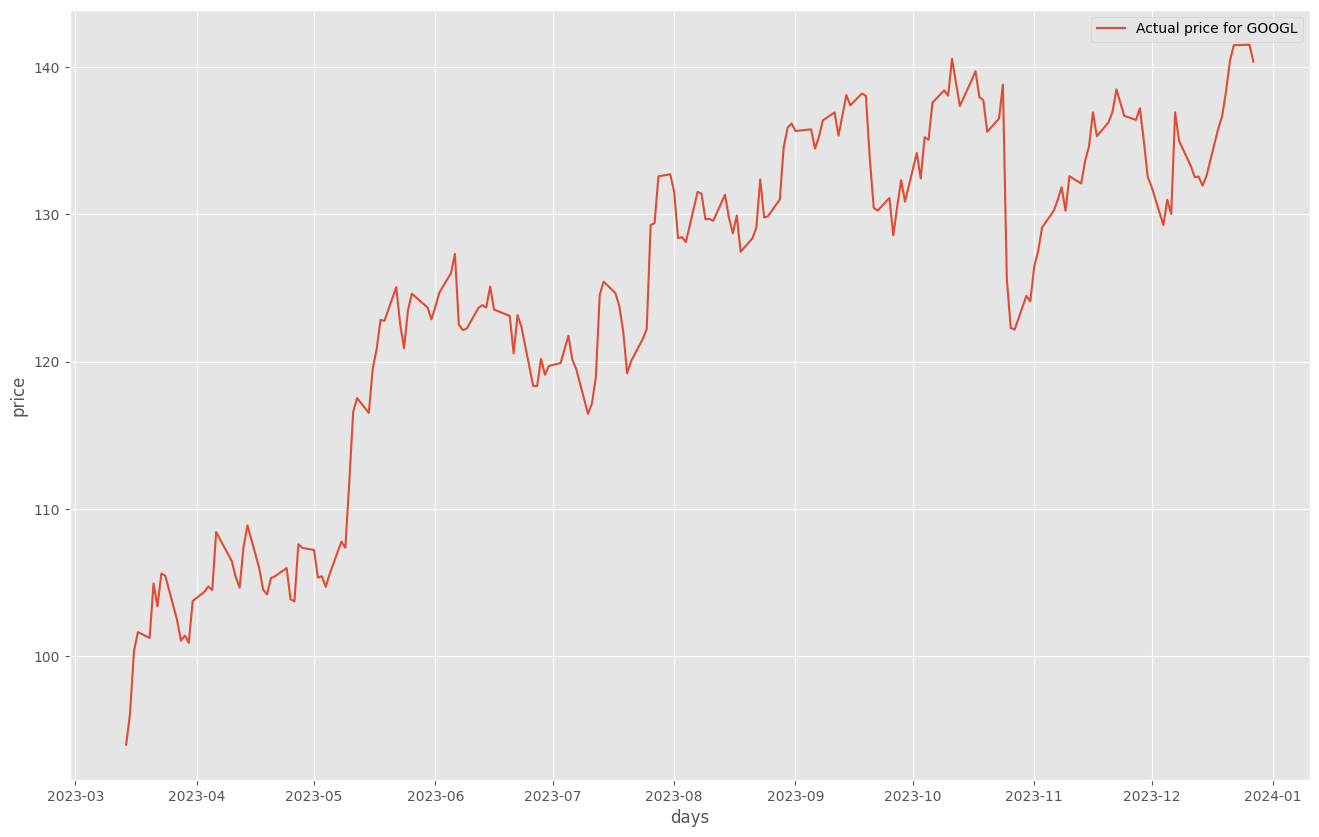

In [ ]:
# Let's see preliminary our data on the graphic
plt.style.use(style='ggplot')
plt.figure(figsize=(16,10))
plt.plot(init_df['close'][-200:])
plt.xlabel("days")
plt.ylabel("price")
plt.legend([f'Actual price for {STOCK}'])
plt.show()

###Scale Data
As we use LSTM neural network we need to scale the data in the column **‘close’** because the machine learning algorithm works much better with scaled than with regular data. The MinMaxScaler scales the closing value between 0 and 1

In [ ]:
# Scale data for ML engine
scaler = MinMaxScaler()
init_df['scaled_close'] = scaler.fit_transform(np.expand_dims(init_df['close'].values, axis=1))

In [ ]:
#show the scaled closing price data as scaled_close
init_df.head()

,close,date,scaled_close
2020-12-21,86.727997,2020-12-21,0.049662
2020-12-22,86.011002,2020-12-22,0.038866
2020-12-23,86.411499,2020-12-23,0.044896
2020-12-24,86.708000,2020-12-24,0.049361
2020-12-28,88.697998,2020-12-28,0.079327


##LSTM Model


###`def PrepareData`
Prepare the model to calculate future data points

In [ ]:
def PrepareData(days):
  df = init_df.copy()
  #Use the *shift* function to reindex the datafram --  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html
  df['future'] = df['scaled_close'].shift(-days)
  #grab the last days of the dataframe
  last_sequence = np.array(df[['scaled_close']].tail(days))
  df.dropna(inplace=True)
  sequence_data = []
  #deque - double entry queue -- Like a list but allows appends to the front and back of the list
  sequences = deque(maxlen=N_STEPS)

  for entry, target in zip(df[['scaled_close'] + ['date']].values, df['future'].values):
      sequences.append(entry)
      if len(sequences) == N_STEPS:
          sequence_data.append([np.array(sequences), target])

  last_sequence = list([s[:len(['scaled_close'])] for s in sequences]) + list(last_sequence)
  last_sequence = np.array(last_sequence).astype(np.float32)

  # construct the X's and Y's for the machine learning model
  X, Y = [], []
  for seq, target in sequence_data:
      X.append(seq)
      Y.append(target)

  # convert to numpy arrays
  X = np.array(X)  #array of sequence on a particular step
  Y = np.array(Y)  #target price on particular step

  return df, last_sequence, X, Y

###`def GetTrainedModel`

Here we use the built in `Sequential` model type in keras and add `LSTM`, dropout, and `Dense` layers.



### TO DO: Toggle parameters
- [ ] Can/Should we toggle the LSTM params?
- [ ] How would changing the `BATCH-SIZE` and `EPOCHS` parameters change the output?
- [ ] What are optimal values for these parameters?
- [ ] Are there performance gains to be had by varying these paramters?

In [ ]:
def GetTrainedModel(x_train, y_train):
  model = Sequential()
  # Add the first LSTM layer with 60 units, return sequences for the next layer,
  # and input shape specified by N_STEPS and the number of features (1 in this case).
  model.add(LSTM(60, return_sequences=True, input_shape=(N_STEPS, len(['scaled_close']))))
  # Add a Dropout layer to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
  model.add(Dropout(0.3))
  # Add the second LSTM layer with 120 units and no need to return sequences as it's the last LSTM layer.
  model.add(LSTM(120, return_sequences=False))
  # Add another Dropout layer for regularization.
  model.add(Dropout(0.3))
  # Add a Dense layer with 20 units.
  model.add(Dense(20))
  # Add the output layer with 1 unit, as this seems to be a regression problem.
  model.add(Dense(1))

  # Set batch size and number of epochs for training.
  BATCH_SIZE = 8
  EPOCHS = 80

  # Compile the model with mean squared error as the loss function and Adam optimizer.
  model.compile(loss='mean_squared_error', optimizer='adam')

  # Train the model on the provided training data.
  model.fit(x_train, y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            verbose=1)

  model.summary()

  return model

###Predict price

In [ ]:
# GET PREDICTIONS
predictions = []

for step in LOOKUP_STEPS:
  #Prepare the data for predictions
  df, last_sequence, x_train, y_train = PrepareData(step)
  #Training on the actual scaled_close price. The future dates will have zeros and are ommitted from the training set
  x_train = x_train[:, :, :len(['scaled_close'])].astype(np.float32)

  #Train the model on the LSTM defined above
  model = GetTrainedModel(x_train, y_train)

  # Take the last N_STEPS of the sequence for prediction
  last_sequence = last_sequence[-N_STEPS:]
  # Add an extra dimension to match the model's input shape
  last_sequence = np.expand_dims(last_sequence, axis=0)

  #use LSTM model to predict closing value for last sequence of days
  prediction = model.predict(last_sequence)

  #convert from scaled_close to close
  predicted_price = scaler.inverse_transform(prediction)[0][0]

  predictions.append(round(float(predicted_price), 2))

Epoch 1/80
94/94 [==============================] - 11s 20ms/step - loss: 0.0244
Epoch 2/80
94/94 [==============================] - 2s 20ms/step - loss: 0.0068
Epoch 3/80
94/94 [==============================] - 2s 19ms/step - loss: 0.0064
Epoch 4/80
94/94 [==============================] - 2s 20ms/step - loss: 0.0059
Epoch 5/80
94/94 [==============================] - 2s 26ms/step - loss: 0.0059
Epoch 6/80
94/94 [==============================] - 2s 27ms/step - loss: 0.0056
Epoch 7/80
94/94 [==============================] - 2s 21ms/step - loss: 0.0054
Epoch 8/80
94/94 [==============================] - 2s 20ms/step - loss: 0.0044
Epoch 9/80
94/94 [==============================] - 2s 25ms/step - loss: 0.0046
Epoch 10/80
94/94 [==============================] - 2s 22ms/step - loss: 0.0041
Epoch 11/80
94/94 [==============================] - 2s 23ms/step - loss: 0.0037
Epoch 12/80
94/94 [==============================] - 2s 26ms/step - loss: 0.0037
Epoch 13/80
94/94 [=================

In [ ]:
if bool(predictions) == True and len(predictions) > 0:
  predictions_list = [str(d)+'$' for d in predictions]
  predictions_str = ', '.join(predictions_list)
  message = f'{STOCK} prediction for upcoming 3 days ({predictions_str})'

  print(message)

GOOGL prediction for upcoming 3 days (141.09$, 140.09$, 139.0$)


##Compare to History

In [ ]:
# Execute model for the whole history range
copy_df = init_df.copy()

# Make predictions using the trained model on the entire training dataset
y_predicted = model.predict(x_train)

# Inverse transform the scaled predictions to get actual predicted prices
y_predicted_transformed = np.squeeze(scaler.inverse_transform(y_predicted))

# Extract the first 6 and last 3 sequences from the original training data and inverse transform
first_seq = scaler.inverse_transform(np.expand_dims(y_train[:6], axis=1))
last_seq = scaler.inverse_transform(np.expand_dims(y_train[-3:], axis=1))

# Combine the actual historical sequences and the predicted sequence
y_predicted_transformed = np.append(first_seq, y_predicted_transformed)
y_predicted_transformed = np.append(y_predicted_transformed, last_seq)
copy_df[f'predicted_close'] = y_predicted_transformed

24/24 [==============================] - 0s 6ms/step


In [ ]:
# Add predicted results to the table
date_now = dt.date.today()
date_tomorrow = dt.date.today() + dt.timedelta(days=1)
date_after_tomorrow = dt.date.today() + dt.timedelta(days=2)
day3 = dt.date.today() + dt.timedelta(days=3)
day4 = dt.date.today() + dt.timedelta(days=4)

copy_df.loc[date_now] = [predictions[0], f'{date_now}', 0,0]
copy_df.loc[date_tomorrow] = [predictions[1], f'{date_tomorrow}', 0,0]
copy_df.loc[date_after_tomorrow] = [predictions[2], f'{date_after_tomorrow}', 0,0]


<ipython-input-16-fd5b25dbafbc>:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  copy_df.loc[date_tomorrow] = [predictions[1], f'{date_tomorrow}', 0,0]
<ipython-input-16-fd5b25dbafbc>:10: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  copy_df.loc[date_after_tomorrow] = [predictions[2], f'{date_after_tomorrow}', 0,0]


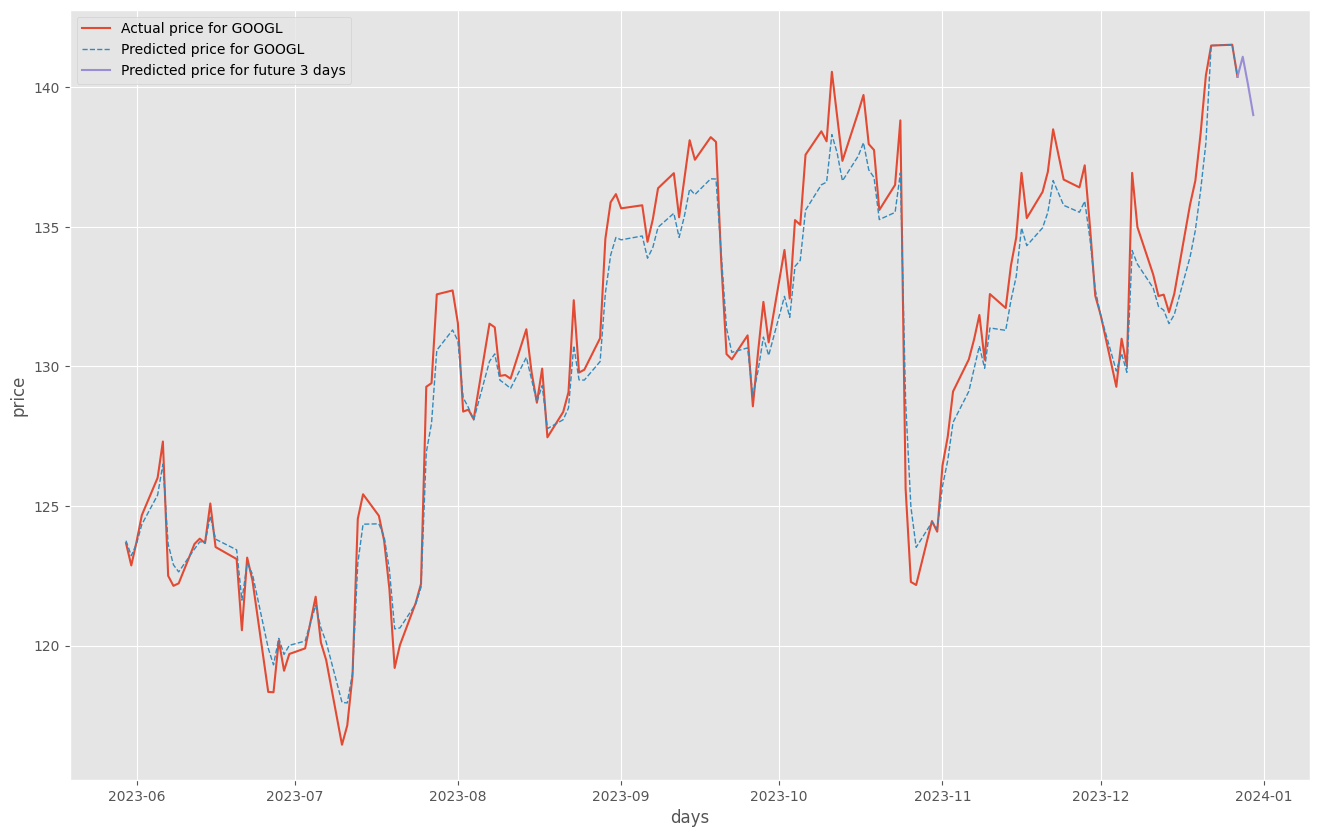

In [ ]:
# Result chart
plt.style.use(style='ggplot')
plt.figure(figsize=(16,10))
plt.plot(copy_df['close'][-150:].head(147))
plt.plot(copy_df['predicted_close'][-150:].head(147), linewidth=1, linestyle='dashed')
plt.plot(copy_df['close'][-150:].tail(4))
plt.xlabel('days')
plt.ylabel('price')
plt.legend([f'Actual price for {STOCK}',
            f'Predicted price for {STOCK}',
            f'Predicted price for future 3 days'])
plt.show()